In [1]:
!gdown 1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH

Downloading...
From (original): https://drive.google.com/uc?id=1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH
From (redirected): https://drive.google.com/uc?id=1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH&confirm=t&uuid=355fa568-691d-4ee4-83c6-50edfa6d4297
To: c:\Users\Tunca\OneDrive\Dokumente\bionluk\AIHEALTHCARE\utils.py

  0%|          | 0.00/745 [00:00<?, ?B/s]
100%|██████████| 745/745 [00:00<?, ?B/s] 


In [2]:
# you can import necessary libraries for your homework solution

import tensorflow as tf
import matplotlib.pyplot as plt

from utils import *

In [3]:
# you can change size parameter with one of 64, 128 and 224
# this might take some time
train_images, train_labels, val_images, val_labels, test_images, test_labels = load_data(size='128')

In [4]:
print(f'The shape of Training images: {train_images.shape}')
print(f'The shape of Training labels: {train_labels.shape}\n')
print(f'The shape of Validation images: {val_images.shape}')
print(f'The shape of Validation labels: {val_labels.shape}\n')
print(f'The shape of Test images: {test_images.shape}')
print(f'The shape of Test labels: {test_labels.shape}')

The shape of Training images: (7007, 128, 128, 3)
The shape of Training labels: (7007, 1)

The shape of Validation images: (1003, 128, 128, 3)
The shape of Validation labels: (1003, 1)

The shape of Test images: (2005, 128, 128, 3)
The shape of Test labels: (2005, 1)


In [5]:
print(f'The number of class 0 (akiec): {sum(train_labels == 0).item():3}')
print(f'The number of class 1 (bcc): {sum(train_labels == 1).item():5}')
print(f'The number of class 2 (bkl): {sum(train_labels == 2).item():5}')
print(f'The number of class 3 (df): {sum(train_labels == 3).item():5}')
print(f'The number of class 4 (nv): {sum(train_labels == 4).item():6}')
print(f'The number of class 5 (mel): {sum(train_labels == 5).item():6}')
print(f'The number of class 6 (vasc): {sum(train_labels == 6).item():3}')

The number of class 0 (akiec): 228
The number of class 1 (bcc):   359
The number of class 2 (bkl):   769
The number of class 3 (df):    80
The number of class 4 (nv):    779
The number of class 5 (mel):   4693
The number of class 6 (vasc):  99


In [6]:
# Normalize images so they can be between 0 and 1

train_images = train_images/255.0
val_images = val_images/255.0
test_images =  test_images/255.0

In [7]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential

# Modeli yeniden oluşturun ve katmanları düzgün şekilde ekleyin
model = Sequential()

# Convolutional katmanı (32 filtre, 3x3 boyutunda, ReLU aktivasyonu, 'same' padding)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))

# MaxPooling katmanı (2x2 boyutunda)
model.add(MaxPool2D((2, 2)))

# Dropout katmanı
model.add(Dropout(0.5))

# İkinci Convolutional katmanı (64 filtre)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# İkinci MaxPooling katmanı
model.add(MaxPool2D((2, 2)))

# Dropout katmanı
model.add(Dropout(0.25))

# Üçüncü Convolutional katmanı (128 filtre)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Üçüncü MaxPooling katmanı
model.add(MaxPool2D((2, 2)))

# Dropout katmanı
model.add(Dropout(0.25))

# Katmanları düzleştirin
model.add(Flatten())

# Tamamen bağlı katman (256 birim)
model.add(Dense(256, activation='relu'))

# Dropout katmanı
model.add(Dropout(0.5))

# Son katman (7 birim, çok sınıflı çıkış için)
model.add(Dense(7, activation='softmax'))

# Modeli özetleyin
model.summary()

c:\Users\Tunca\anaconda3\envs\bionlukk\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,483,911 (32.36 MB)

 Trainable params: 8,483,911 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='sgd',  # Optimizatör
    loss='sparse_categorical_crossentropy',  # Çok sınıflı kayıp fonksiyonu
    metrics=['accuracy']  # Performans metriği
)

In [9]:
# Define the number of epochs and batch size
epochs = 10  # Adjust according to your needs
batch_size = 32  # Adjust according to your GPU memory limitations

# Optional: Define callbacks


# Train the model and store the history
history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_images, val_labels),  # Use validation data 
)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 37s 166ms/step - accuracy: 0.6588 - loss: 1.1838 - val_accuracy: 0.6690 - val_loss: 1.4237
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 36s 162ms/step - accuracy: 0.6714 - loss: 1.0321 - val_accuracy: 0.6690 - val_loss: 1.2998
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 161ms/step - accuracy: 0.6638 - loss: 1.0037 - val_accuracy: 0.6690 - val_loss: 1.1990
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 36s 166ms/step - accuracy: 0.6681 - loss: 0.9721 - val_accuracy: 0.6690 - val_loss: 1.1523
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 37s 171ms/step - accuracy: 0.6746 - loss: 0.9456 - val_accuracy: 0.6740 - val_loss: 1.2489
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 160ms/step - accuracy: 0.6705 - loss: 0.9536 - val_accuracy: 0.6790 - val_loss: 1.1481
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 161ms/step - accuracy: 0.6717 - loss: 0.9414 - val_accuracy: 0.6720 - val_loss: 1.0423
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 162ms/step - accuracy: 0.6772 - loss: 0

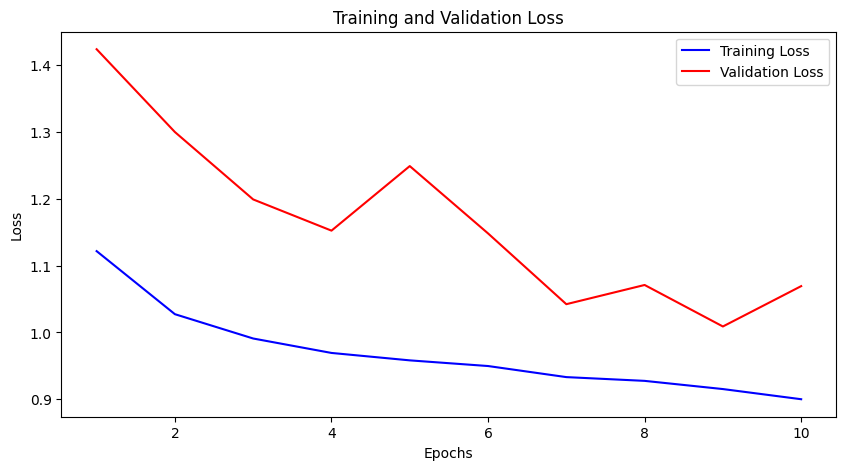

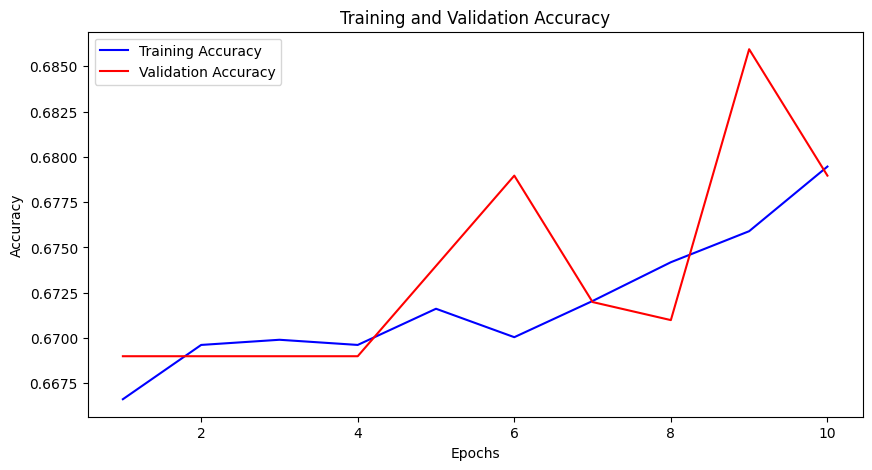

In [10]:
# Plot (and save) the graphs of loss and metric values
import matplotlib.pyplot as plt

# Eğitim geçmişi (history) nesnesinden kayıp (loss) ve doğruluk (accuracy) bilgilerini al
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Kayıp grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')  # 'b-' mavi çizgi
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')  # 'r-' kırmızı çizgi
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Etiketler için gösterge
plt.show()  # Grafiği görüntüle

# Doğruluk grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=16)

126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6865 - loss: 1.0590
